<p><img src="https://github.com/the-Coding-Boot-Camp-at-UT/UTAAU201710DATA1-Class-Repository-DATA/raw/master/1-Class-Content/05-Matplotlib/Homework/Instructions/Images/Laboratory.jpg" alt="Laboratory" style="max-width:20%;"></img></p>
<p></p>

<p>Oberservation 1: Capomolin and Ramicane are the only two drugs that seem to effectively halt the growth of tumor</p>
<p>Observation 2: Ketapril,Naftisol and Stelasyn are the drugs that seem to accelerate tumor growth.</p>
<p>Observation 3: Effective Treatment can increase survival by 10%, while ineffective treament decrease suvival rate by 7.5%.</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



<h4>Cleaning up the Data</h4>

In [2]:
pharm_mouse_df = pd.read_csv("raw_data/mouse_drug_data.csv")
test_df = pd.read_csv("raw_data/clinicaltrial_data.csv")
trial_df = pd.merge(test_df,pharm_mouse_df,on='Mouse ID')
trial_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [3]:
clincal_df = trial_df.groupby(["Drug","Timepoint"]).agg({"Tumor Volume (mm3)":"mean","Metastatic Sites":"sum", "Mouse ID":"count"})
clincal_df_sem = trial_df.groupby(["Drug","Timepoint"]).sem()["Tumor Volume (mm3)"]


clincal_df.reset_index(inplace=True)
clincal_drug = clincal_df.pivot(columns="Drug",index="Timepoint")

clincal_df_sem = pd.DataFrame(clincal_df_sem)


clincal_drug

Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   
25                 39.939528  54.287674  55.715252  57.678982  56.731968   
30                 38.769339  56.769517  58.299397  60.994507  59.559509   
35                 37.816839  58.827548  60.742461  63.371686  62.685087   
40                 36.958001  61.467895  63.162824  66.068580  65.600754   
45                 36.236114  64.132421  65.755562  70.662958  69.265506   

                                                                    ...     \
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol    ...      
Timepoint                                                           ...      
0          45.000000  45.000000  45.000000  45.000000  45.000000    ...      
5          47.125589  47.248967  43.944859  47.527452  46.851818    ...      
10         49.423329  49.101541  42.531957  49.463844  48.689881    ...      
15         51.359742  51.067318  41.495061  51.529409  50.779059    ...      
20         54.364417  53.346737  40.238325  54.067395  53.170334    ...      
25         57.482574  55.504138  38.974300  56.166123  55.432935    ...      
30         59.809063  58.196374  38.703137  59.826738  57.713531    ...      
35         62.420615  60.350199  37.451996  62.440699  60.089372    ...      
40         65.052675  63.045537  36.574081  65.356386  62.916692    ...      
45         68.084082  66.258529  34.955595  68.438310  65.960888    ...      

           Mouse ID                                                        \
Drug      Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                   
0                25       25        25       25       25      25       26   
5                25       21        25       23       23      24       25   
10               25       20        21       22       21      24       23   
15               24       19        21       19       21      20       17   
20               23       18        20       19       20      19       17   
25               22       18        18       19       18      17       14   
30               22       16        17       18       15      15       13   
35               22       14        12       17       15      14       10   
40               21       14        10       15       15      12        9   
45               21       13         9       11       13      11        7   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
0               25       26        25  
5               25       25        24  
10              24       23        22  
15              24       23        21  
20              23       21        17  
25              23       19        16  
30              23       18        15  
35              21       16        14  
40              20       12        14  
45              20       11        14  

[10 rows x 30 columns]

In [4]:
clincal_df_sem = clincal_df_sem.reset_index()
clincal_pivot_sem = clincal_df_sem.pivot(index='Timepoint',columns = 'Drug')['Tumor Volume (mm3)']


num_drugs = len(clincal_df["Drug"].unique())
tumor = clincal_drug["Tumor Volume (mm3)"]
tumor.head()



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334



<h4>scatter plot that shows how the tumor volume changes over time for each treatment</h4>

In [5]:
plt.figure(figsize=(8,5))
for i in range(num_drugs):
    plt.scatter(x_axis, tumor.iloc[:,i])

plt.legend(title='Drug', bbox_to_anchor=(1.05, 1), )
for i in range(num_drugs):
    plt.plot(x_axis,tumor.iloc[:,i])


plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint')
plt.title('Tumor Volume vs Time')


plt.show()

#plt.scatter(x=trial_df["Timepoint"], y=trial_df["Tumor Volume (mm3)"])
#plt.show()
#trial_df.plot(x="Timepoint",y="Tumor Volume (mm3)",kind="scatter")
#trial_df_drug.plot(x= "Timepoint",y="Drug",type="scatter")

NameError: name 'x_axis' is not defined

In [6]:
plt.figure(figsize=(8,5))
metastatic_site = clincal_drug["Metastatic Sites"]

for i in range(num_drugs):
    plt.scatter(x_axis, metastatic_site.iloc[:,i])
    
    plt.legend(title='Drug', bbox_to_anchor=(1.05, 1), )
    
for i in range(num_drugs):
    plt.plot(x_axis, metastatic_site.iloc[:,i])

plt.show()

NameError: name 'x_axis' is not defined

In [7]:
plt.figure(figsize=(8,5))
surv_rate = clincal_drug["Mouse ID"]

for i in range(num_drugs):
    plt.scatter(x_axis, surv_rate.iloc[:,i])

plt.legend(title='Drug', bbox_to_anchor=(1.05, 1), )

for i in range(num_drugs):
    plt.plot(x_axis, surv_rate.iloc[:,i])


plt.show()

NameError: name 'x_axis' is not defined

<h4>Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days.</h4>

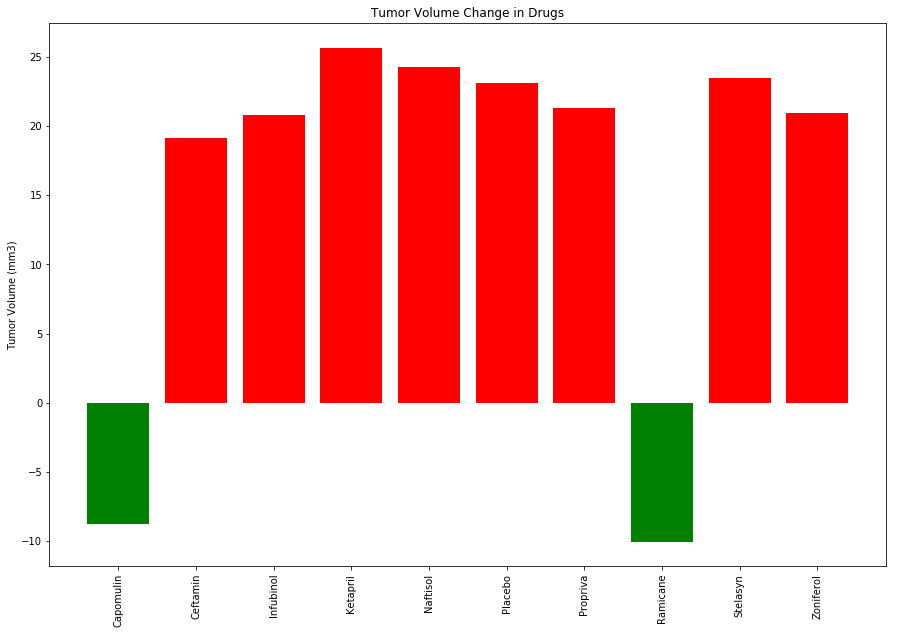

In [10]:
tumor_change_df = clincal_drug["Tumor Volume (mm3)"].iloc[[0,-1]]

tumor_changes = pd.DataFrame(tumor_change_df.to_records())

drugs = clincal_df["Drug"].unique()

diff = []

plt.figure(figsize=(15,10))

for drug in drugs:
    diff.append(tumor_changes[drug][1] - tumor_changes[drug][0])

x_axis = np.arange(0,len(drugs),1)

plt.bar(x_axis,diff,color = ['red' if diff[r] > 0 else 'green' for r in np.arange(len(drugs))]
       )

count = 0
       
      
plt.xticks(x_axis,drugs,rotation="vertical")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume Change in Drugs")
plt.show()






#for x in range(0,1):
#    tumor_change.iloc[x + 1] - tumor_change[x] 